In [126]:
%matplotlib inline

In [127]:
import glob
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
sns.set_style("whitegrid")

In [128]:
# The optimal average return of the MDP.
# Compute this instead of hardcoding it because it'll get stale fast.
# I computed this by uniformly averaging the values output from value iteration for the starting room.
_OPTIMAL_V = 0.9373168211111111

In [129]:
viz_dir = "../../data/"
results_dir = os.path.join(viz_dir, "results")
os.makedirs(results_dir, exist_ok=True)
dirpaths = glob.glob(os.path.join(viz_dir, "muzero_*"))

In [130]:
returns = []
for dirpath in dirpaths:
    returns += [np.array(pd.read_csv(os.path.join(dirpath, "stats.csv"))["avg_discounted_return"])]
returns = np.array(returns)

In [135]:
def plot_returns(returns, steps_each=100):
    plt.figure(figsize=(10, 6))
    
    means = returns.mean(axis=0) 
    y_err = np.std(returns, axis=0)
    x_values = np.arange(len(means))* steps_each
    
    plt.plot(x_values, means, label="Tabular MuZero", c="b")
    plt.fill_between(x_values, y2=means + y_err, y1=means - y_err, color="b", alpha=0.2)
    
    plt.plot(x_values, np.ones_like(x_values) * _OPTIMAL_V, c="g", label="Optimal Expected Value", linestyle="--")
    
    plt.xlabel("Steps", fontsize=14)
    plt.ylabel("Discounted Return", fontsize=14)
    plt.title("Discounted Return vs Environment Steps", fontsize=14)
    plt.legend(fontsize=14)
    plt.tight_layout()

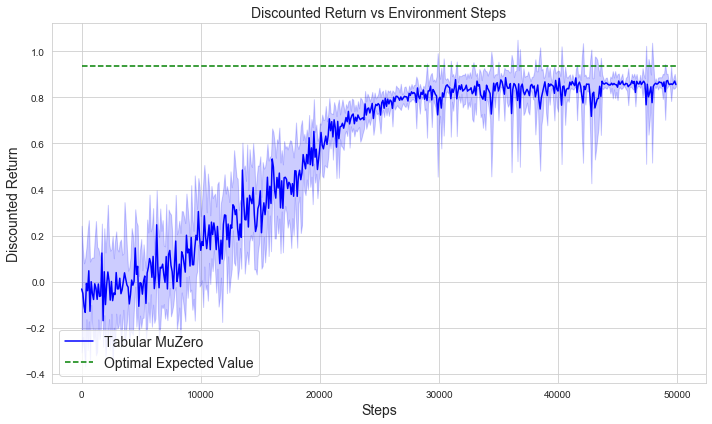

In [136]:
plot_returns(returns)
plt.savefig(os.path.join(results_dir, "average_discounted_return.png"))